In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [87]:
df1=pd.read_excel(r"C:\Users\User\Downloads\Power Exchange Data_ 2010.xlsx", sheet_name=None)

In [88]:
df1=df1['Daily Prices & Volumes']
df1



,Date,Average price (EUR/MWh),Traded volumes (MWh)
0,2010.07.21,47.803208,2278.1
1,2010.07.22,58.061250,917.6
2,2010.07.23,46.146042,1004.3
3,2010.07.24,43.593292,496.0
4,2010.07.25,19.148125,468.0
...,...,...,...
159,2010.12.27,55.974958,3701.4
160,2010.12.28,42.750333,3693.6
161,2010.12.29,49.985208,4059.6
162,2010.12.30,50.574417,3624.9


In [89]:
df1=df1[["Date","Average price (EUR/MWh)"]]
df1

,Date,Average price (EUR/MWh)
0,2010.07.21,47.803208
1,2010.07.22,58.061250
2,2010.07.23,46.146042
3,2010.07.24,43.593292
4,2010.07.25,19.148125
...,...,...
159,2010.12.27,55.974958
160,2010.12.28,42.750333
161,2010.12.29,49.985208
162,2010.12.30,50.574417


In [71]:
def replace_outliers_with_neighbors(df):
    for i in range(1, len(df) - 1):  
        for j in range(1,2):  
            current_value = df.iloc[i, j]
            upper_value = df.iloc[i - 1, j]
            lower_value = df.iloc[i + 1, j]
            neighbor_values = [upper_value, lower_value]
            mean_neighbor_value = sum(neighbor_values) /2
            if abs(current_value - mean_neighbor_value) > 10 * mean_neighbor_value or current_value<0:  
                df.iloc[i, j] = mean_neighbor_value 

In [92]:
replace_outliers_with_neighbors(df1)

In [39]:
df2=pd.read_excel(r"C:\Users\User\Downloads\Power Exchange Data_ 2011.xlsx", sheet_name=None)
df3=pd.read_excel(r"C:\Users\User\Downloads\Power Exchange Data_ 2012.xlsx", sheet_name=None)
df4=pd.read_excel(r"C:\Users\User\Downloads\Power Exchange Data_ 2013.xlsm", sheet_name=None)
df5=pd.read_excel(r"C:\Users\User\Downloads\Power Exchange Data_ 2014.xlsm", sheet_name=None)
df6=pd.read_excel(r"C:\Users\User\Downloads\Power Exchange Data_ 2015.xlsm", sheet_name=None)
df7=pd.read_excel(r"C:\Users\User\Downloads\Power Exchange Data_ 2016.xlsm", sheet_name=None)
df8=pd.read_excel(r"C:\Users\User\Downloads\Power Exchange Data_ 2017.xlsm", sheet_name=None)

In [43]:
df4.keys()

dict_keys(['Hourly Prices', 'Daily Prices', 'Weekly Prices', 'Monthly Prices', 'Annual Prices'])

C:\Users\User\AppData\Local\Temp\ipykernel_26072\2888776670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Date"]=pd.to_datetime(df1["Date"])


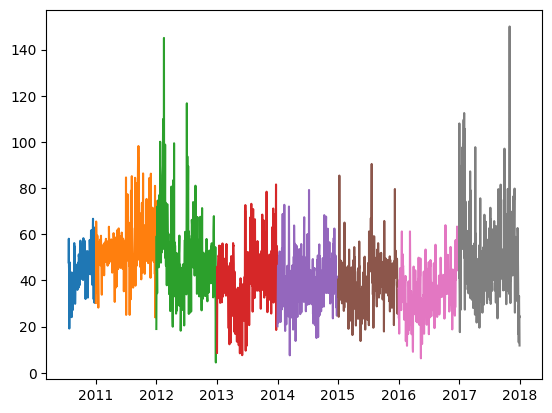

In [244]:
all_prices=[]
all_dates=[]
df1["Date"]=pd.to_datetime(df1["Date"])
plt.plot(df1["Date"],df1["Average price (EUR/MWh)"])
all_prices.extend(df1["Average price (EUR/MWh)"].tolist())
all_dates.extend(df1["Date"].tolist())
dfs=[df2,df3]
dfs2=[df4]
dfs3=[df5,df6,df7,df8]
for i in dfs:
    i=i['Daily Prices & Volumes']
    all_dates.extend(i["Date"].tolist())
    i["Date"]=pd.to_datetime(i["Date"])
    replace_outliers_with_neighbors(i)
    all_prices.extend(i["Average price (EUR/MWh)"].tolist())
    plt.plot(i["Date"],i["Average price (EUR/MWh)"])
    
for i in dfs2:
    i=i['Daily Prices']
    all_dates.extend(i["Date"].tolist())
    i["Date"]=pd.to_datetime(i["Date"])
    replace_outliers_with_neighbors(i)
    all_prices.extend(i["Average prices (EUR/MWh)"].tolist())
    plt.plot(i["Date"],i["Average prices (EUR/MWh)"])  

for i in dfs3:
    i=i['Daily Prices']
    i=i.groupby("Date").mean().reset_index()
    all_dates.extend(i["Date"].tolist())
    i["Date"] = pd.to_datetime(i["Date"], format='%d/%m/%Y')
    all_prices.extend(i["Average Prices (EUR/MWh)"].tolist())
    plt.plot(i["Date"],i["Average Prices (EUR/MWh)"])

<bound method NDFrame.head of           Date  Average Prices (EUR/MWh)
0   2014-01-01                 20.143750
1   2014-01-02                 29.068750
2   2014-01-03                 34.364583
3   2014-01-04                 46.384167
4   2014-01-05                 22.995000
..         ...                       ...
360 2014-12-27                 39.270833
361 2014-12-28                 38.925000
362 2014-12-29                 39.453750
363 2014-12-30                 41.663333
364 2014-12-31                 32.472083

[365 rows x 2 columns]>


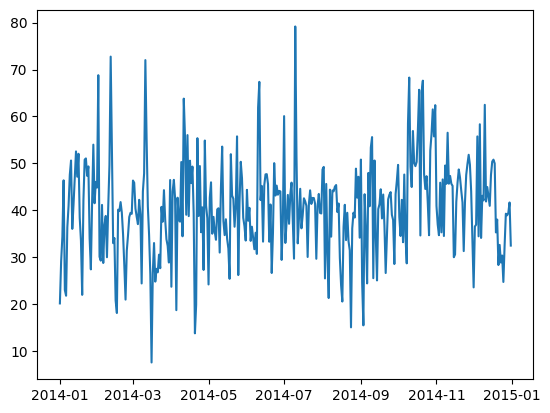

In [66]:
# Assuming df is your DataFrame containing the data

i=df5['Daily Prices']
i=i.groupby("Date").mean().reset_index()
i["Date"] = pd.to_datetime(i["Date"], format='%d/%m/%Y')
#replace_outliers_with_neighbors(i)
print(i.head)
plt.plot(i["Date"],i["Average Prices (EUR/MWh)"])

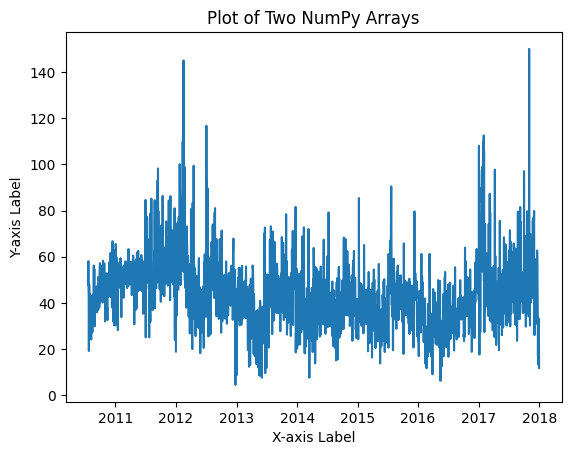

array([Timestamp('2010-07-30 00:00:00'), Timestamp('2010-07-31 00:00:00'),
       Timestamp('2010-08-01 00:00:00')], dtype=object)

In [96]:
import numpy as np
import matplotlib.dates as mdates
all_dates=np.array(all_dates)
dates = pd.to_datetime(all_dates, format='%Y/%m/%d')
all_prices=np.array(all_prices)

plt.plot(dates, all_prices)

# Add labels to the axes
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Add a title to the plot
plt.title('Plot of Two NumPy Arrays')

# Show the plot
plt.show()
all_dates[9:12]

In [101]:
df = pd.DataFrame({'Date': dates, 'Price': all_prices})

In [102]:
df

,Date,Price
0,2010-07-21,47.803208
1,2010-07-22,58.061250
2,2010-07-23,46.146042
3,2010-07-24,43.593292
4,2010-07-25,19.148125
...,...,...
2717,2017-12-27,30.209583
2718,2017-12-28,33.220417
2719,2017-12-29,23.760000
2720,2017-12-30,24.729167


In [103]:
from copy import deepcopy as dc
def shifted(df,n):
    df=dc(df)
    df.set_index("Date",inplace=True)
    for i in range(1,n+1):
        df[f'Price(t-{i})']=df['Price'].shift(i)
    df.dropna(inplace=True)

    return df
shifted_df=shifted(df,7)
shifted_df

,Price,Price(t-1),Price(t-2),Price(t-3),Price(t-4),Price(t-5),Price(t-6),Price(t-7)
Date,,,,,,,,
2010-07-28,43.732667,47.853458,38.118250,19.148125,43.593292,46.146042,58.061250,47.803208
2010-07-29,43.872417,43.732667,47.853458,38.118250,19.148125,43.593292,46.146042,58.061250
2010-07-30,42.241417,43.872417,43.732667,47.853458,38.118250,19.148125,43.593292,46.146042
2010-07-31,38.432792,42.241417,43.872417,43.732667,47.853458,38.118250,19.148125,43.593292
2010-08-01,28.923208,38.432792,42.241417,43.872417,43.732667,47.853458,38.118250,19.148125
...,...,...,...,...,...,...,...,...
2017-12-27,30.209583,13.164167,28.967917,16.803750,36.416250,40.885000,51.454167,59.938750
2017-12-28,33.220417,30.209583,13.164167,28.967917,16.803750,36.416250,40.885000,51.454167
2017-12-29,23.760000,33.220417,30.209583,13.164167,28.967917,16.803750,36.416250,40.885000


In [104]:
df=shifted_df.to_numpy()

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler=MinMaxScaler(feature_range=(-1,1))
df=scaler.fit_transform(df)
df

array([[-0.46026474, -0.40364806, -0.53740273, ..., -0.42710672,
        -0.26340044, -0.40433846],
       [-0.45834468, -0.46026474, -0.40364806, ..., -0.46217965,
        -0.42710672, -0.26340044],
       [-0.48075343, -0.45834468, -0.46026474, ..., -0.79803843,
        -0.46217965, -0.42710672],
       ...,
       [-0.73467463, -0.6046954 , -0.64606205, ..., -0.83024844,
        -0.56078697, -0.4993896 ],
       [-0.72135899, -0.73467463, -0.6046954 , ..., -0.66312165,
        -0.83024844, -0.56078697],
       [-0.89898487, -0.72135899, -0.73467463, ..., -0.88025366,
        -0.66312165, -0.83024844]])

In [170]:
X=df[:,1:]
y=df[:,0]
X.shape,y.shape

((2699, 7), (2699,))

In [171]:
split_index = int(len(X) * 0.9)
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2429, 7), (270, 7), (2429,), (270,))

In [172]:
lookback=7
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2429, 7, 1), (270, 7, 1), (2429, 1), (270, 1))

In [173]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([2429, 7, 1]),
 torch.Size([270, 7, 1]),
 torch.Size([2429, 1]),
 torch.Size([270, 1]))

In [174]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [175]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [176]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [177]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to('cpu')
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [178]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [185]:
from sklearn.metrics import mean_squared_error, r2_score

def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    y_true = []
    y_pred = []
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()
            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(output.cpu().numpy())

    avg_loss_across_batches = running_loss / len(test_loader)
    r_squared = r2_score(y_true, y_pred)
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('Val R^2: {0:.3f}'.format(r_squared))
    print('***************************************************')
    print()

In [186]:
learning_rate = 0.001
num_epochs = 50

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.020

Val Loss: 0.037
Val R^2: 0.076
***************************************************

Epoch: 2
Batch 100, Loss: 0.019

Val Loss: 0.037
Val R^2: 0.068
***************************************************

Epoch: 3
Batch 100, Loss: 0.019

Val Loss: 0.037
Val R^2: 0.071
***************************************************

Epoch: 4
Batch 100, Loss: 0.019

Val Loss: 0.038
Val R^2: 0.048
***************************************************

Epoch: 5
Batch 100, Loss: 0.020

Val Loss: 0.037
Val R^2: 0.069
***************************************************

Epoch: 6
Batch 100, Loss: 0.019

Val Loss: 0.037
Val R^2: 0.075
***************************************************

Epoch: 7
Batch 100, Loss: 0.019

Val Loss: 0.037
Val R^2: 0.080
***************************************************

Epoch: 8
Batch 100, Loss: 0.019

Val Loss: 0.037
Val R^2: 0.080
***************************************************

Epoch: 9
Batch 100, Loss: 0.019

Val Loss: 0.037
Val R^2: 0.077


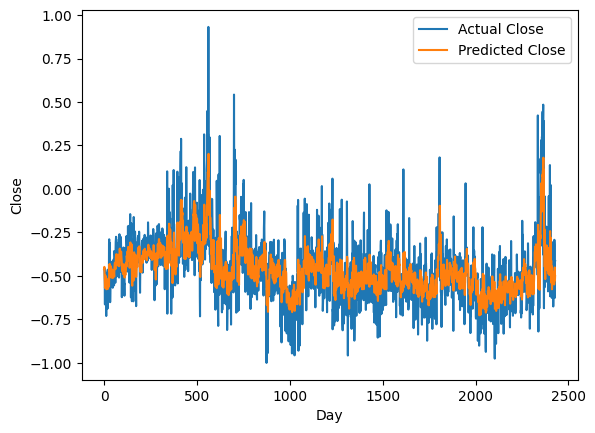

In [187]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [188]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([43.68471551, 44.64032754, 41.75962636, ..., 44.40779203,
       38.93585627, 40.82302462])

In [189]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([43.73266639, 43.87241719, 42.24141707, ..., 31.649583  ,
       47.11124892, 47.08833419])

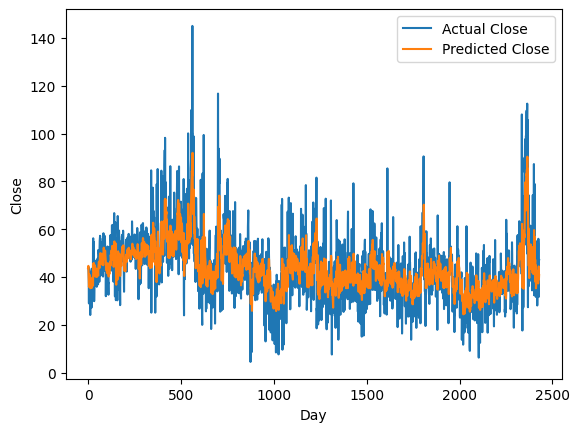

In [190]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [191]:

z=new_y_train-train_predictions
z=np.square(z)
z=np.mean(z)

In [192]:
z=np.sqrt(z)
print('Root Mean Square Error is ', z)

Root Mean Square Error is  10.20529868411758


In [193]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([42.26198046, 38.09198935, 42.10774201, 56.47349631, 43.25238973,
       46.36197795, 49.40686089, 45.49927861, 47.08865522, 50.78112013,
       39.8151972 , 37.9505488 , 37.29814267, 38.08634093, 38.79776485,
       38.71817065, 37.82619668, 36.44770328, 37.06432737, 42.49422097,
       42.63274187, 43.86742168, 43.02667832, 42.17886358, 39.75689088,
       39.13129525, 44.15426797, 43.79246508, 35.71370301, 40.40453792,
       40.24578767, 38.48302783, 44.49406283, 50.68658927, 45.08258361,
       48.68916383, 46.8467664 , 47.64419215, 49.96733911, 46.77397894,
       43.62552418, 44.42402582, 43.2923018 , 44.44556966, 42.1635842 ,
       37.52472174, 36.24149672, 42.15181882, 44.3382062 , 45.55276512,
       42.97689669, 44.26393071, 41.2694194 , 41.10517691, 42.31895927,
       44.54411343, 45.18597322, 46.54847576, 49.7808977 , 42.44284286,
       43.74414979, 42.13225323, 45.78308378, 47.83032555, 49.2697022 ,
       45.23286556, 44.76759931, 49.73374072, 46.16148488, 45.31

In [194]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([ 25.17541619,  41.10416609,  97.72291726,  40.24291574,
        52.74708228,  60.28166717,  49.86791685,  42.52874925,
        36.74083139,  34.87041743,  21.75458326,  24.91750181,
        38.53916502,  42.57083262,  44.60541749,  42.84333226,
        43.52916691,  39.12666632,  49.30041714,  43.53583266,
        47.95625029,  44.71333408,  42.31333254,  36.08333214,
        31.28291691,  55.15166721,  44.26291773,  19.51916477,
        51.61333229,  44.03624972,  36.66666869,  49.44958415,
        75.56958328,  53.40375076,  51.31791575,  50.25666689,
        52.57333247,  49.37041727,  30.59958328,  42.53625011,
        44.53791621,  40.56916652,  46.85375101,  42.12416669,
        36.07208301,  26.02500094,  51.87958265,  52.36416721,
        51.67166681,  46.19083327,  54.33208375,  41.96875041,
        29.36499891,  40.75166879,  47.28791622,  49.65708352,
        51.33083294,  68.45166682,  42.11666583,  44.45291652,
        35.44041814,  48.89708401,  49.95666697,  49.69

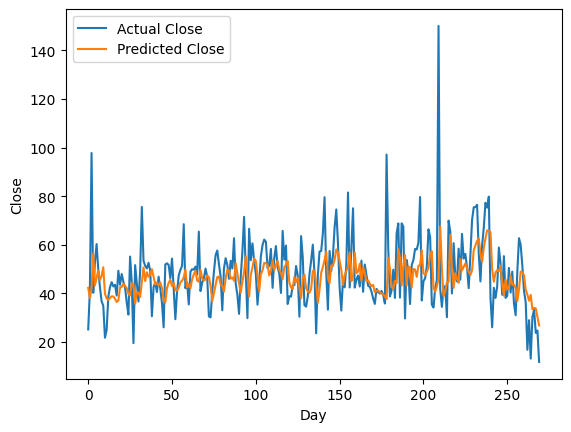

In [195]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

# Till now we trained the model on 90% data and tried to predict the prices for the next 10% . This was done to estimate the efficiency of the model and it was found to be quite effective with an RMSE of 10.20983074206445

# Now we will train it throughout for all the 8 years and then predict the prices for the next year (2018)

In [196]:
X2=X.reshape((-1,7,1))
y2=y.reshape((-1,1))
X2.shape

(2699, 7, 1)

In [198]:
X2=torch.tensor(X2).float()
y2=torch.tensor(y2).float()

In [204]:
train_dataset = PredictionDataset(X2,y2)
train_dataset

In [205]:
batch_size=16

train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
device='cpu'
train_loader


In [206]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to('cpu'), batch[1].to('cpu')
    print(x_batch.shape, y_batch.shape)
    break
    

torch.Size([16, 7, 1]) torch.Size([16, 1])


C:\Users\User\AppData\Local\Temp\ipykernel_26072\1125493986.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x=torch.tensor(self.X[i],dtype=torch.float32)
C:\Users\User\AppData\Local\Temp\ipykernel_26072\1125493986.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.tensor(self.y[i],dtype=torch.float32)


In [207]:
model = LSTM(1, 4, 1)
model.to('cpu')
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [208]:
learning_rate = 0.001
num_epochs = 100

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()

Epoch: 1


C:\Users\User\AppData\Local\Temp\ipykernel_26072\1125493986.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x=torch.tensor(self.X[i],dtype=torch.float32)
C:\Users\User\AppData\Local\Temp\ipykernel_26072\1125493986.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.tensor(self.y[i],dtype=torch.float32)


Batch 100, Loss: 0.378

Epoch: 2
Batch 100, Loss: 0.031

Epoch: 3
Batch 100, Loss: 0.026

Epoch: 4
Batch 100, Loss: 0.025

Epoch: 5
Batch 100, Loss: 0.024

Epoch: 6
Batch 100, Loss: 0.022

Epoch: 7
Batch 100, Loss: 0.023

Epoch: 8
Batch 100, Loss: 0.023

Epoch: 9
Batch 100, Loss: 0.025

Epoch: 10
Batch 100, Loss: 0.023

Epoch: 11
Batch 100, Loss: 0.023

Epoch: 12
Batch 100, Loss: 0.022

Epoch: 13
Batch 100, Loss: 0.023

Epoch: 14
Batch 100, Loss: 0.024

Epoch: 15
Batch 100, Loss: 0.023

Epoch: 16
Batch 100, Loss: 0.022

Epoch: 17
Batch 100, Loss: 0.023

Epoch: 18
Batch 100, Loss: 0.023

Epoch: 19
Batch 100, Loss: 0.022

Epoch: 20
Batch 100, Loss: 0.023

Epoch: 21
Batch 100, Loss: 0.024

Epoch: 22
Batch 100, Loss: 0.024

Epoch: 23
Batch 100, Loss: 0.023

Epoch: 24
Batch 100, Loss: 0.023

Epoch: 25
Batch 100, Loss: 0.024

Epoch: 26
Batch 100, Loss: 0.023

Epoch: 27
Batch 100, Loss: 0.022

Epoch: 28
Batch 100, Loss: 0.023

Epoch: 29
Batch 100, Loss: 0.024

Epoch: 30
Batch 100, Loss: 0.024

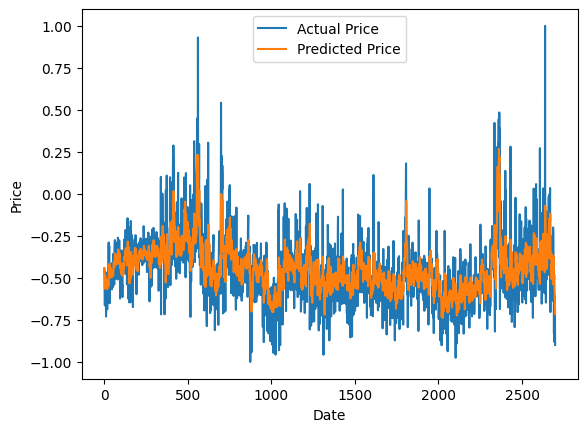

In [209]:
with torch.no_grad():
    predicted = model(X2.to(device)).to('cpu').numpy()

plt.plot(y2, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [211]:
train_predictions1 = predicted.flatten()

dummies = np.zeros((X2.shape[0], 8))
dummies[:, 0] = train_predictions1
dummies = scaler.inverse_transform(dummies)

train_predictions1 = dc(dummies[:, 0])
train_predictions1

array([44.10101356, 45.26505117, 42.53448878, ..., 33.37613131,
       29.63319499, 25.23937528])

In [213]:
dummies = np.zeros((X2.shape[0], 8))
dummies[:, 0] = y2.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([43.73266639, 43.87241719, 42.24141707, ..., 23.75999979,
       24.72916457, 11.8008347 ])

In [217]:
shifted_df['Price'][2698]

11.800833333333333

In [219]:
data_original=shifted_df

In [234]:
df_new = pd.DataFrame({'Date': dates, 'Price': all_prices})
new_dates = pd.date_range(start=df_new['Date'].iloc[-1] + pd.Timedelta(days=1), periods=365, freq='D')
new_prices = [float('nan')] * 365 # Initialize prices as NaN
new_df = pd.DataFrame({'Date': new_dates, 'Price': new_prices})
new_df

,Date,Price
0,2018-01-01,NaN
1,2018-01-02,NaN
2,2018-01-03,NaN
3,2018-01-04,NaN
4,2018-01-05,NaN
...,...,...
360,2018-12-27,NaN
361,2018-12-28,NaN
362,2018-12-29,NaN
363,2018-12-30,NaN


In [235]:
for k in range(1,8):
    new_df[f'Price(t-{k})']=new_df['Price'][k]
data_original=new_df
new_df.set_index("Date",inplace=True)
combined_df = pd.concat([shifted_df, new_df], ignore_index=True)
combined_df['Price'][2699]

nan

In [236]:
data_original=combined_df

In [239]:
predicted_prices=[]
for i in range(2699,3064):
    for k in range(1,8):
        data_original[f'Price(t-{k})'][i]=data_original['Price'][i-k]
    test=data_original.iloc[i:i+1]
    print(test)
    test=test.to_numpy()
    Xt=test[:,0:]
    Xt=scaler.transform(Xt)

    Xt=Xt[:,1:]

  #yt=test[:,1]
    X_test=Xt.reshape((-1,7,1))
  #y_test=yt.reshape((-1,1))
    X_test=torch.tensor(X_test).float()
  #y_test=torch.tensor(y_test).float()
    with torch.no_grad():
        predicted = model(X_test.to(device)).to('cpu').numpy()
    train_predictions = predicted.flatten()

    dummies = np.zeros((X_test.shape[0], 8))
    dummies[:, 0] = train_predictions
    dummies = scaler.inverse_transform(dummies)

    train_predictions = dc(dummies[:, 0])
    data_original['Price'][i]=train_predictions[0]
    predicted_prices.append(train_predictions[0])


      Price  Price(t-1)  Price(t-2)  Price(t-3)  Price(t-4)  Price(t-5)  \
2699    NaN   11.800833   24.729167       23.76   33.220417   30.209583   

      Price(t-6)  Price(t-7)  
2699   13.164167   28.967917  
      Price  Price(t-1)  Price(t-2)  Price(t-3)  Price(t-4)  Price(t-5)  \
2700    NaN    25.12124   11.800833   24.729167       23.76   33.220417   

      Price(t-6)  Price(t-7)  
2700   30.209583   13.164167  
      Price  Price(t-1)  Price(t-2)  Price(t-3)  Price(t-4)  Price(t-5)  \
2701    NaN   23.827421    25.12124   11.800833   24.729167       23.76   

      Price(t-6)  Price(t-7)  
2701   33.220417   30.209583  
      Price  Price(t-1)  Price(t-2)  Price(t-3)  Price(t-4)  Price(t-5)  \
2702    NaN    28.10255   23.827421    25.12124   11.800833   24.729167   

      Price(t-6)  Price(t-7)  
2702       23.76   33.220417  
      Price  Price(t-1)  Price(t-2)  Price(t-3)  Price(t-4)  Price(t-5)  \
2703    NaN   28.834776    28.10255   23.827421    25.12124   11.800833  

In [240]:
predicted_prices

[25.12123989554743,
 23.82742081998537,
 28.10254985536138,
 28.834775775379192,
 26.950175675886374,
 26.63624123654018,
 24.640130291475604,
 27.560778247180085,
 27.997516044198225,
 29.271595999492956,
 29.64772385161991,
 29.428606601847957,
 29.4387191050003,
 29.33061813822637,
 30.16119693639378,
 30.583752934696776,
 31.10252304493139,
 31.38956889803211,
 31.529460694106916,
 31.69826704767222,
 31.883879852208,
 32.24951777185003,
 32.548615333984294,
 32.846984067062536,
 33.08239151389028,
 33.27702791626255,
 33.47114806472013,
 33.67335474508504,
 33.90795961229752,
 34.129150554264584,
 34.34271482075254,
 34.53667879155527,
 34.71673427453886,
 34.89253825469564,
 35.06805157088364,
 35.246827264751,
 35.42021049125741,
 35.58788889509315,
 35.747550179312626,
 35.900665016832455,
 36.04965849957119,
 36.19584946105878,
 36.33980187616001,
 36.479893232571584,
 36.615819851520165,
 36.74716525925945,
 36.87435460607211,
 36.99804297045494,
 37.11865984095881,
 37.23635

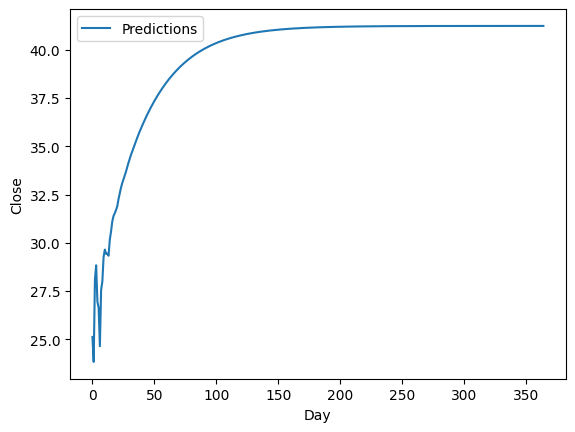

In [241]:
plt.plot(predicted_prices, label='Predictions')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [246]:
df_saved = pd.DataFrame({'Date': new_dates, 'Predicted Price(EUR/MWh)':predicted_prices})
df_saved.to_csv('output_sustainify.csv', index=False)

In [248]:
import os
downloads_folder = os.path.join(os.path.expanduser('~'), 'Downloads')

csv_path = os.path.join(downloads_folder, 'output.csv')
df_saved.to_csv(csv_path, index=False)


In [249]:
price_1_jan=df_saved['Predicted Price(EUR/MWh)'][0]
price_1_jan

25.12123989554743

In [250]:
# Thats the price on 1st January 2018

In [260]:
def optimizer(p):
    if p>=57.62:
        print("Q_Solar:150MWh  Q_Grid:1050MWh  Q_Exchange:0MWh")
        Q_Solar=150
        Q_Grid=1050
        Q_Exchange=0
        return Q_Solar,Q_Grid, Q_Exchange
    else:
        Q_Solar=150
        Q_Grid=375
        Q_Exchange=675
        print("Q_Solar:150MWh  Q_Grid:375MWh  Q_Exchange:675MWh)")
        return Q_Solar,Q_Grid, Q_Exchange
        
Q_Solar,Q_Grid,Q_Exchange=optimizer(price_1_jan)


Q_Solar:150MWh  Q_Grid:375MWh  Q_Exchange:675MWh)


# Total Renewable electricity is 20%.

In [261]:
Total_price= Q_Solar * 0 + Q_Grid*57.62 + Q_Exchange*price_1_jan

In [264]:
print('Total Price of Energy in EUR' , Total_price)

Total Price of Energy in EUR 38564.336929494515
